# SCC-ICMC-USP - 2º Semestre de 2023
## SCC0275 - Introdução à Ciência de Dados
### Professora: Roseli A. F. Romero
### Monitor: Roseval Malaquias Jr

### **Exercício 3**

**Alunos:**
1. Lucas Yuji Matubara

Nesta atividade, nosso objetivo é exercitar os seguintes conceitos:
- Manuseio e exploração de datasets utilizando a biblioteca `pandas`;
- Análise de variância e sua interpretação para a limpeza de datasets;
- Utilização de métodos de imputação de valores faltantes com a biblioteca `scikit-learn`;
- Transformação de variáveis utilizando a biblioteca `scikit-learn`;

---

Para os exercícios de **1** a **5**, utilizaremos o dataset **titanic.csv**. A célula de código a seguir realizará o download deste dataset para o ambiente virtual do Google Colab.


In [ ]:
# Download do dataset para o ambiente virtual.
!wget -O titanic.csv "https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3"

--2023-09-28 19:18:46--  https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3
Resolving drive.google.com (drive.google.com)... 142.251.2.100, 142.251.2.138, 142.251.2.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ecui72n1n96tvgams1eounamv8oeak71/1695928725000/17263126637575785733/*/1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3?e=download&uuid=21c1251f-0c60-4128-a2fd-462dd6b38806 [following]
--2023-09-28 19:18:46--  https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ecui72n1n96tvgams1eounamv8oeak71/1695928725000/17263126637575785733/*/1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3?e=download&uuid=21c1251f-0c60-4128-a2fd-462dd6b38806
Resolving doc-0s-a0-docs.googleusercontent.com (doc-0s-a0-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b

## Dataset **titanic.csv**

---
### Questão 01.

Carregue o dataset **titanic.csv** (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values='?'`.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
titanic = pd.read_csv('titanic.csv', na_values = '?')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Notamos que os valores ausentes se apresentam nos atributos de Age e Cabin majoritariamente, e em apenas duas tuplas em Embarked. Ou seja, não sabemos idade de 177 passageiros, não sabemos qual a cabine de 687 passageiros, e não sabemos em qual porto 2 passageiros embarcaram.

---
### Questão 02.
Realize uma análise exploratória inicial do dataset fornecido.

Para isso, você deve:

 - Apresente a quantidade de valores faltantes para cada variável do dataset.
 - Identifique o tipo de dado de cada uma das variáveis (se são numéricas ou categóricas). Pode-se induzir o tipo real das variáveis utilizando o nome delas e seus valores, ou acessar um [dicionário do dataset online](https://www.codingninjas.com/studio/library/intro-to-titanic-dataset-and-data-analysis).
 - Corrija os tipos das variáveis no dataframe pandas criado.

  **ATENÇÃO: O pandas pode importar as variáveis com os tipos incorretos!**

In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Notamos que todos os tipos das variaveis, categóricas e numéricas, estão de acordo com seu contexto. Apenas idade que possui float, que não faz sentido ao meu ver se as idades não considerarem meses, vamos ver se existe alguma idade que possua casas decimais.

In [ ]:
mask = ~titanic['Age'].isna()
aux = titanic['Age'][mask] % 1 != 0

for valor, idade in zip(aux, titanic['Age'][mask]):
    if valor:
        print(f"Valor: {idade}")

Valor: 28.5
Valor: 0.83
Valor: 14.5
Valor: 70.5
Valor: 32.5
Valor: 32.5
Valor: 36.5
Valor: 55.5
Valor: 40.5
Valor: 45.5
Valor: 20.5
Valor: 23.5
Valor: 0.92
Valor: 45.5
Valor: 0.75
Valor: 40.5
Valor: 0.75
Valor: 24.5
Valor: 28.5
Valor: 0.67
Valor: 30.5
Valor: 0.42
Valor: 30.5
Valor: 0.83
Valor: 34.5


Existem. Portanto vou considerar que essas variáveis consideram os meses e portanto estão corretas.



---

### Questão 03.

Realize o pré-processamento do dataset fornecido.

Para isso, você deve:


-   **Para as variáveis numéricas:** substitua os valores faltantes utilizando a estratégia de **mediana** (`sklearn.impute.SimpleImputer`). Depois, **normalize** as variáveis (`sklearn.preprocessing.MinMaxScaler`).
-   **Para as variáveis categóricas:** substitua os valores faltantes utilizando a estratégia de **mais frequentes** (`sklearn.impute.SimpleImputer`). Depois, converta os dados categóricos para uma representação numérica, utilizando a codificação **Label Encoding** (`sklearn.preprocessing.LabelEncoder`).

Por fim, apresente os resultados, comprovando que a imputação e transformações foram feitas corretamente.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
imputer = SimpleImputer(strategy = 'median')
titanic['Age'] = imputer.fit_transform(titanic['Age'].values.reshape(-1, 1))

imputer = MinMaxScaler()
titanic['Age'] = imputer.fit_transform(titanic['Age'].values.reshape(-1, 1))

imputer = SimpleImputer(strategy='most_frequent')
frequente = ['Cabin', 'Embarked']
for col in frequente:
  titanic[col] = imputer.fit_transform(titanic[col].values.reshape(-1, 1))

categoricos = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
imputer = LabelEncoder()
for col in categoricos:
  titanic[col] = imputer.fit_transform(titanic[col])

titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64



---

### Questão 04.

Neste conjunto de dados, entre as variáveis tem alguma que tem outliers? Se sim, indique-os.

Procurarei outliers nas categorias de Age, Fare, SibSp, e Parch que são numéricas. Note que existem variaveis que são int64 mas que são categoricas.

In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7ab3bcaa70d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ab3bcaa7610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ab3bcaa6e30>],
 'medians': [<matplotlib.lines.Line2D at 0x7ab3bcaa7b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ab3bcaa7e50>],
 'means': []}

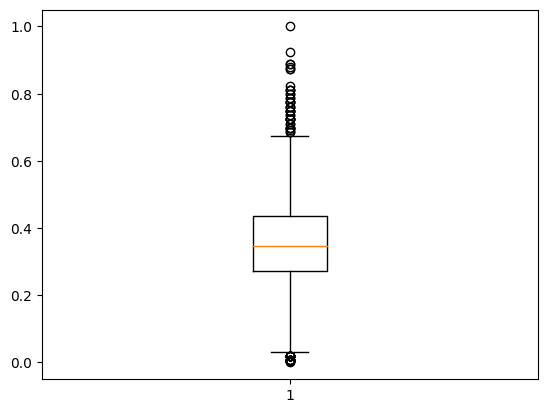

In [ ]:
plt.boxplot(titanic['Age'])

In [ ]:
media_age = np.mean(titanic['Age'])
desvio_padrao_age = np.std(titanic['Age'])
Q1 = np.percentile(titanic['Age'], 25)
Q3 = np.percentile(titanic['Age'], 75)
IQR = Q3 - Q1
outliers_age = titanic[(titanic['Age'] < Q1 - 1.5 * IQR) | (titanic['Age'] > Q3 + 1.5 * IQR)]
outliers_age.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,7,0,2,624,1,0.019854,3,1,395,21.075,47,2
11,11,1,0,95,0,0.723549,0,0,38,26.550,49,2
15,15,1,1,359,0,0.685851,0,0,153,16.000,47,2


{'whiskers': [<matplotlib.lines.Line2D at 0x7ab3bc922560>,
 'caps': [<matplotlib.lines.Line2D at 0x7ab3bc922aa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ab3bc9222c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ab3bc922fe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ab3bc923280>],
 'means': []}

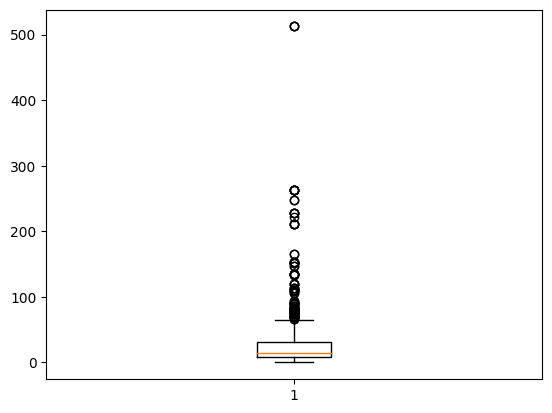

In [ ]:
plt.boxplot(titanic['Fare'])

In [ ]:
media_fare = np.mean(titanic['Fare'])
desvio_padrao_fare = np.std(titanic['Fare'])
Q1 = np.percentile(titanic['Fare'], 25)
Q3 = np.percentile(titanic['Fare'], 75)
IQR = Q3 - Q1
outliers_fare = titanic[(titanic['Fare'] < Q1 - 1.5 * IQR) | (titanic['Fare'] > Q3 + 1.5 * IQR)]
outliers_fare.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,0,190,0,0.472229,1,0,596,71.2833,81,0
27,27,0,0,260,1,0.233476,3,2,95,263.0000,63,2
31,31,1,0,776,0,0.346569,1,0,586,146.5208,41,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7ab3bc9a5210>,
 'caps': [<matplotlib.lines.Line2D at 0x7ab3bc9a5750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ab3bc9a4f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7ab3bc9a5c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ab3bc9a5f30>],
 'means': []}

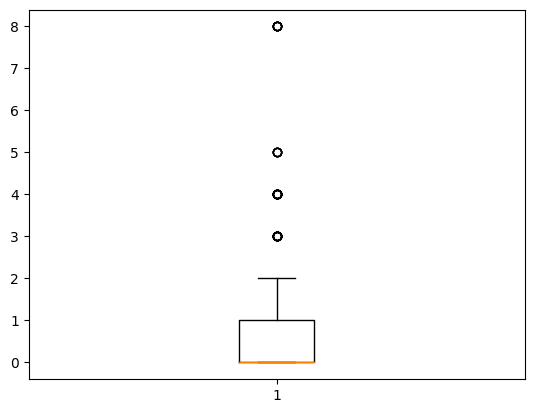

In [ ]:
plt.boxplot(titanic['SibSp'])

In [ ]:
media_sibsp = np.mean(titanic['SibSp'])
desvio_padrao_sibsp = np.std(titanic['SibSp'])
Q1 = np.percentile(titanic['SibSp'], 25)
Q3 = np.percentile(titanic['SibSp'], 75)
IQR = Q3 - Q1
outliers_sibsp = titanic[(titanic['SibSp'] < Q1 - 1.5 * IQR) | (titanic['SibSp'] > Q3 + 1.5 * IQR)]
outliers_sibsp.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,7,0,2,624,1,0.019854,3,1,395,21.075,47,2
16,16,0,2,682,1,0.019854,4,1,480,29.125,47,1
24,24,0,2,626,0,0.095250,3,1,395,21.075,47,2


{'whiskers': [<matplotlib.lines.Line2D at 0x7ab3bc8162f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ab3bc816710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ab3bc816050>],
 'medians': [<matplotlib.lines.Line2D at 0x7ab3bc816c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ab3bc816ef0>],
 'means': []}

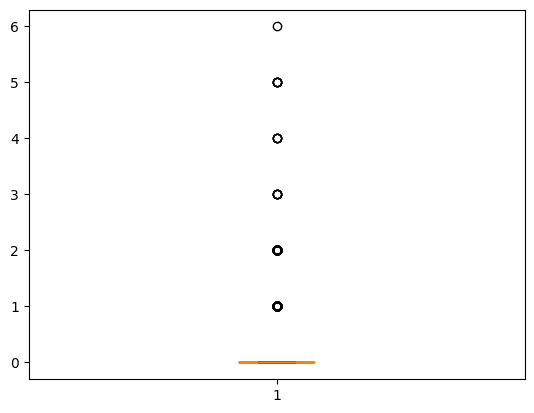

In [ ]:
plt.boxplot(titanic['Parch'])

In [ ]:
media_parch = np.mean(titanic['Parch'])
desvio_padrao_parch = np.std(titanic['Parch'])
Q1 = np.percentile(titanic['Parch'], 25)
Q3 = np.percentile(titanic['Parch'], 75)
IQR = Q3 - Q1
outliers_parch = titanic[(titanic['Parch'] < Q1 - 1.5 * IQR) | (titanic['Parch'] > Q3 + 1.5 * IQR)]
outliers_parch.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,7,0,2,624,1,0.019854,3,1,395,21.0750,47,2
8,8,1,2,412,0,0.334004,0,2,344,11.1333,47,2
10,10,1,2,727,0,0.044986,1,1,616,16.7000,145,2




---

### Questão 05.

Determine as 3 variáveis categóricas com maior variância (`pandas.DataFrame.var`).

Por que seria difícil extrair conhecimento destas 3 variáveis?

> Lembre-se que após realizar a transformação das variáveis categóricas com codificação Label Encoding, essas variáveis tornaram-se do tipo numérico para o pandas. Contudo, **o conhecimento representado por elas ainda é categórico!**

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,0.271174,1,0,523,7.2500,47,2
1,1,1,0,190,0,0.472229,1,0,596,71.2833,81,0
2,2,1,2,353,0,0.321438,0,0,669,7.9250,47,2
3,3,1,0,272,0,0.434531,1,0,49,53.1000,55,2
4,4,0,2,15,1,0.434531,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,1,0.334004,0,0,101,13.0000,47,2
887,887,1,0,303,0,0.233476,0,0,14,30.0000,30,2
888,888,0,2,413,0,0.346569,1,2,675,23.4500,47,2
889,889,1,0,81,1,0.321438,0,0,8,30.0000,60,0


In [ ]:
categoricos = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
var = []
for col in categoricos:
  var = titanic[categoricos].var()

var

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Name           66231.000000
Sex                0.228475
Ticket         40340.986540
Cabin            555.464442
Embarked           0.626477
dtype: float64

Portanto as 3 variaveis categoricas com maior variancia são SibSp, Pclass, e Parch



---

### Questão 05.

Com as 3 varíaveis identificadas na questão anterior, crie um novo dataset que não contenha essas 3 váriaveis.

Apresente as 5 primeiras linhas do novo dataset criado.

In [ ]:
novo_df = titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1).copy()
novo_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,1,0.271174,1,0,7.2500,47,2
1,1,0,0,0.472229,1,0,71.2833,81,0
2,1,2,0,0.321438,0,0,7.9250,47,2
3,1,0,0,0.434531,1,0,53.1000,55,2
4,0,2,1,0.434531,0,0,8.0500,47,2
